# Algorithms

In [40]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import folium
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Ucitavanje pretprocesiranih podataka

In [2]:
def dataset_partitioning(X_balanced, y_balanced):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.111, random_state=42, stratify=y_balanced)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

    print('Broj ciljnih vrednosti \'closed\' u trening skupu:', np.sum(y_train==0))
    print('Broj ciljnih vrednosti \'closed\' u test skupu:', np.sum(y_test==0))
    print('Broj ciljnih vrednosti \'closed\' u validacionom skupu:', np.sum(y_val==0))
    return X_train, y_train, X_test, y_test, X_val, y_val

In [3]:
X_oversampling = pd.read_csv('oversampling_x.csv')
y_oversampling = pd.read_csv('oversampling_y.csv')
y_oversampling = y_oversampling.values.reshape(-1)

In [4]:
X_train_o, y_train_o, X_test_o, y_test_o, X_val_o, y_val_o = dataset_partitioning(X_oversampling, y_oversampling)

Broj ciljnih vrednosti 'closed' u trening skupu: 18591
Broj ciljnih vrednosti 'closed' u test skupu: 2580
Broj ciljnih vrednosti 'closed' u validacionom skupu: 2066


In [5]:
X_undersampling = pd.read_csv('undersampling_x.csv')
y_undersampling = pd.read_csv('undersampling_y.csv')
dfTarget = pd.concat([X_undersampling, y_undersampling], axis=1)
dfTarget = dfTarget.rename(columns={0: 'status'})
y_undersampling = y_undersampling.values.reshape(-1)

In [6]:
X_undersampling

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,latitude,longitude,twiter_categorical,web_page_categorical,advertising,...,security,semiconductor,social,software,sports,transportation,travel,web,Company,FinancialOrg
0,0.0,0.0,1.0,5000000.0,0.0,37.090240,-95.712891,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,37.090240,-95.712891,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,1.0,1000000.0,4.0,30.268735,-97.745209,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.0,2.0,9000000.0,3.0,37.697805,-121.907768,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0.0,0.0,4.0,23500000.0,4.0,49.263588,-123.138565,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.0,0.0,2.0,38993849.0,0.0,0.000000,0.000000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1104,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1105,0.0,0.0,0.0,0.0,0.0,34.923168,-95.723008,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1106,0.0,0.0,0.0,0.0,2.0,34.031646,-118.455352,1,1,0,...,0,0,0,0,0,0,0,1,1,0


In [7]:
y_undersampling

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
dfTarget

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,latitude,longitude,twiter_categorical,web_page_categorical,advertising,...,semiconductor,social,software,sports,transportation,travel,web,Company,FinancialOrg,status
0,0.0,0.0,1.0,5000000.0,0.0,37.090240,-95.712891,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,37.090240,-95.712891,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,1.0,1000000.0,4.0,30.268735,-97.745209,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0.0,0.0,2.0,9000000.0,3.0,37.697805,-121.907768,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0.0,0.0,4.0,23500000.0,4.0,49.263588,-123.138565,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.0,0.0,2.0,38993849.0,0.0,0.000000,0.000000,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1104,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1105,0.0,0.0,0.0,0.0,0.0,34.923168,-95.723008,1,1,0,...,0,0,0,0,0,0,0,1,0,1
1106,0.0,0.0,0.0,0.0,2.0,34.031646,-118.455352,1,1,0,...,0,0,0,0,0,0,1,1,0,1


In [9]:
X_train_u, y_train_u, X_test_u, y_test_u, X_val_u, y_val_u = dataset_partitioning(X_undersampling, y_undersampling)

Broj ciljnih vrednosti 'closed' u trening skupu: 443
Broj ciljnih vrednosti 'closed' u test skupu: 62
Broj ciljnih vrednosti 'closed' u validacionom skupu: 49


## Precision, recall i F1 mera: za manjinsku klasu i ceo dataset

In [10]:
def get_precision_recall_f1score_for_minority_class(y_test, y_test_pred):
    # Izvlacenje **manjiske klase**
    y_test1 = np.array(y_test)
    y_test_pred1 = np.array(y_test_pred)

    # Izdvajanje indeksa gde se nalaze vrednosti 0 u y_test
    idx = np.where(y_test1 == 0)[0]

    # Izdvajanje samo vrednosti 0 iz y_test i y_test_pred pomocu indeksa
    y_test1 = y_test1[idx]
    y_test_pred1 = y_test_pred1[idx]

    precision = precision_score(y_test1, y_test_pred1, pos_label=0)
    recall = recall_score(y_test1, y_test_pred1, pos_label=0)
    f1 = f1_score(y_test1, y_test_pred1, pos_label=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)

In [11]:
def get_precision_recall_f1score(y_test, y_test_pred):
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)

## Random Forest 

In [12]:
# Kreiraj instancu Random Forest klasifikatora sa 10 stabala
def random_forest(X_train, y_train, X_test, y_test, n_estimator): 
    rfc = RandomForestClassifier(n_estimators=n_estimator)

    # Obuči model na X_train i y_train podacima
    rfc.fit(X_train, y_train)

    # Predvidi klase za X_train i X_test podatke
    y_train_pred = rfc.predict(X_train)
    y_test_pred = rfc.predict(X_test)

    # Izračunaj tačnost modela
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
#     print(y_test_pred)
    return y_test_pred

In [13]:
# Random Forest - undersampling
y_rnd_forest_u_pred = random_forest(X_train_u, y_train_u, X_test_u, y_test_u, 10)
print("\n*** Precision recall i f1 mera nad celim skupom ***")
get_precision_recall_f1score(y_test_u, y_rnd_forest_u_pred)
print("\n*** Precision recall i f1 mera nad manjinskoj klasi ***")
get_precision_recall_f1score_for_minority_class(y_test_u, y_rnd_forest_u_pred)

Train Accuracy: 0.9525959367945824
Test Accuracy: 0.7398373983739838

*** Precision recall i f1 mera nad celim skupom ***
Precision:  0.7543859649122807
Recall:  0.7049180327868853
F1-score:  0.7288135593220338

*** Precision recall i f1 mera nad manjinskoj klasi ***
Precision:  1.0
Recall:  0.7741935483870968
F1-score:  0.8727272727272727


In [14]:
# Random Forest - oversampling
y_rnd_forest_o_pred = random_forest(X_train_o, y_train_o, X_test_o, y_test_o, 10)
print("\n*** Precision recall i f1 mera nad celim skupom ***")
get_precision_recall_f1score(y_test_o, y_rnd_forest_o_pred)
print("\n*** Precision recall i f1 mera nad manjinskoj klasi ***")
get_precision_recall_f1score_for_minority_class(y_test_o, y_rnd_forest_o_pred)

Train Accuracy: 0.9898340639539575
Test Accuracy: 0.9732506299670479

*** Precision recall i f1 mera nad celim skupom ***
Precision:  0.9747180085569818
Recall:  0.9716944552151997
F1-score:  0.9732038834951455

*** Precision recall i f1 mera nad manjinskoj klasi ***
Precision:  1.0
Recall:  0.9748062015503876
F1-score:  0.9872423945044161


## Linearna regresija (TODO: nije na spisku - obrisati?)

In [15]:
def linear_regression(X_train, y_train, X_test, y_test):
    reg = LinearRegression()

    # Obuči model na trening podacima
    reg.fit(X_train, y_train)

    # Predvidi vrednosti za test podatke
    y_pred = reg.predict(X_test)

    # Izračunaj srednju kvadratnu grešku
    mse = mean_squared_error(y_test, y_pred)

    # Prikaz rezultata
#     print("Koeficijenti regresije:", reg.coef_)
#     print("Intercept:", reg.intercept_)
    print("Linear regression accuracy:", mse)

In [16]:
linear_regression(X_train_u, y_train_u, X_test_u, y_test_u)

Linear regression accuracy: 0.17895286652193892


In [17]:
linear_regression(X_train_o, y_train_o, X_test_o, y_test_o)

Linear regression accuracy: 0.0727173774451587


## Logisticka regresija

In [18]:
def logistic_regression(X_train, y_train, X_test, y_test):
    # kreiranje objekta modela logističke regresije
    lr_model = LogisticRegression()

    # učenje modela na trening skupu podataka
    lr_model.fit(X_train, y_train)

    # predviđanje izlaza za test skup podataka
    y_pred = lr_model.predict(X_test)

    # izračunavanje tačnosti modela
    accuracy = lr_model.score(X_test, y_test)

    # ispisivanje tačnosti
    print("Logistic regression accuracy:", accuracy)

In [19]:
logistic_regression(X_train_u, y_train_u, X_test_u, y_test_u)

Logistic regression accuracy: 0.36585365853658536


In [20]:
logistic_regression(X_train_o, y_train_o, X_test_o, y_test_o)

Logistic regression accuracy: 0.4956386896685404


## K-Nearest Neighbour

In [21]:
def knn(X_train, y_train, X_test, y_test, n_neighbors=5):
    # Inicijalizacija klasifikatora k-najbližih suseda
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Treniranje klasifikatora k-najbližih suseda na trening skupu podataka
    knn_model.fit(X_train, y_train)
    
    # Predviđanje ciljnih vrednosti na test skupu podataka
    y_pred = knn_model.predict(X_test)
    
    # Izračunavanje tačnosti predikcije
    accuracy = accuracy_score(y_test, y_pred)
    print("KNN accuracy: ", accuracy)

In [22]:
knn(X_train_u, y_train_u, X_test_u, y_test_u)
knn(X_train_u, y_train_u, X_test_u, y_test_u, 3) 

KNN accuracy:  0.6747967479674797
KNN accuracy:  0.6747967479674797


In [23]:
knn(X_train_o, y_train_o, X_test_o, y_test_o)
knn(X_train_o, y_train_o, X_test_o, y_test_o, 3)

KNN accuracy:  0.8648962977321186
KNN accuracy:  0.8720682302771855


## Decision tree

In [24]:
def decision_tree(X_train, y_train, X_test, y_test, max_depth=None, min_samples_split=2):
    # Inicijalizacija klasifikatora odlučivanja
    dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    
    # Treniranje klasifikatora odlučivanja na trening skupu podataka
    dtc.fit(X_train, y_train)
    
    # Predviđanje ciljnih vrednosti na test skupu podataka
    y_pred = dtc.predict(X_test)
    
    # Izračunavanje tačnosti predikcije
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision tree accuracy: ", accuracy)

In [25]:
decision_tree(X_train_u, y_train_u, X_test_u, y_test_u)

Decision tree accuracy:  0.8455284552845529


In [26]:
decision_tree(X_train_o, y_train_o, X_test_o, y_test_o) # !!

Decision tree accuracy:  0.9693739096724171


## Bagging 

In [27]:
def bagging(X_train, y_train, X_test, y_test):
    # kreiranje objekta baznog modela - odlučivanje drveta (Decision Tree)
    base_model = DecisionTreeClassifier()

    # kreiranje objekta modela Bagging
    bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

    # treniranje modela
    bagging_model.fit(X_train, y_train)

    # evaluacija modela
    accuracy = bagging_model.score(X_test, y_test)
    print("Bagging accuracy:", accuracy)

In [28]:
bagging(X_train_u, y_train_u, X_test_u, y_test_u)

Bagging accuracy: 0.7967479674796748


In [29]:
bagging(X_train_o, y_train_o, X_test_o, y_test_o)

Bagging accuracy: 0.9722814498933902


## XGBoost

In [30]:
def xgboost(X_train, y_train, X_test, y_test):
    # kreiranje objekta modela XGBoost
    xgb_model = xgb.XGBClassifier()

    # treniranje modela
    xgb_model.fit(X_train, y_train)

    # evaluacija modela
    accuracy = xgb_model.score(X_test, y_test)
    print("XGBoost accuracy:", accuracy)
    return xgb_model

In [31]:
def optimize_hyperparameters(model, X_train, y_train, X_test, y_test):
    #TODO: optimizovati
    # definisanje mreže hiperparametara koje želimo da isprobamo
    param_grid = {'max_depth': [3, 4, 5],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'n_estimators': [50, 100, 200]}
                # 'subsample': [0.6, 0.8, 1.0],
                # 'colsample_bytree': [0.6, 0.8, 1.0]}

    # kreiranje objekta GridSearchCV
    grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5)

    # treniranje modela sa GridSearchCV objektom
    grid_search.fit(X_train, y_train)

    # evaluacija modela
    accuracy = grid_search.score(X_test, y_test)
    print('Optimizing hyperparameters:', accuracy)

In [32]:
xgb_model = xgboost(X_train_u, y_train_u, X_test_u, y_test_u)

XGBoost accuracy: 0.8048780487804879


In [33]:
xgb_model_o = xgboost(X_train_o, y_train_o, X_test_o, y_test_o)

XGBoost accuracy: 0.9720876138786586


In [34]:
# optimize_hyperparameters(xgb_model, X_train_u, y_train_u, X_test_u, y_test_u)

## Prikazivanje uspesnosti startup-a na karti sveta - prebaciti u KT1, analiza podataka

In [35]:
dfTarget

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,latitude,longitude,twiter_categorical,web_page_categorical,advertising,...,semiconductor,social,software,sports,transportation,travel,web,Company,FinancialOrg,status
0,0.0,0.0,1.0,5000000.0,0.0,37.090240,-95.712891,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,37.090240,-95.712891,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,1.0,1000000.0,4.0,30.268735,-97.745209,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0.0,0.0,2.0,9000000.0,3.0,37.697805,-121.907768,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0.0,0.0,4.0,23500000.0,4.0,49.263588,-123.138565,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.0,0.0,2.0,38993849.0,0.0,0.000000,0.000000,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1104,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1105,0.0,0.0,0.0,0.0,0.0,34.923168,-95.723008,1,1,0,...,0,0,0,0,0,0,0,1,0,1
1106,0.0,0.0,0.0,0.0,2.0,34.031646,-118.455352,1,1,0,...,0,0,0,0,0,0,1,1,0,1


In [36]:
world_map = folium.Map(location=[0, 0], zoom_start=1)
counter = 0
for x in dfTarget.to_dict('records'):
    counter += 1 
    if (np.isnan(x['latitude']) and np.isnan(x['longitude'])):
        continue
    else:
        if counter >= 1000:
            if x['status'] == 1.0:
                folium.Marker(
                    location=[x['latitude'],x['longitude']],
                    popup='success startup',
                    icon=folium.Icon(color='green')
                ).add_to(world_map)
            else:
                folium.Marker(
                    location=[x['latitude'], x['longitude']],
                    popup='closed startup',
                    icon=folium.Icon(color='red')
                ).add_to(world_map)

In [37]:
display(world_map)

## Matrica konfuzije

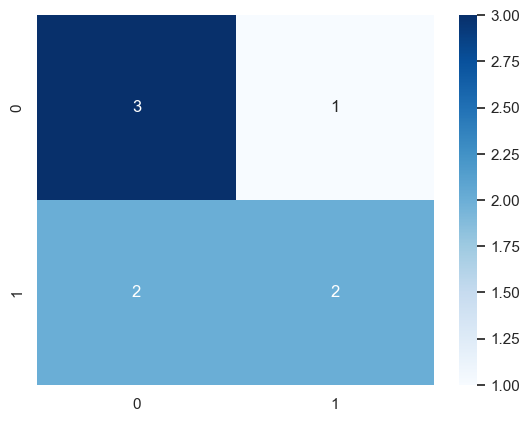

In [41]:
# Primer stvarnih i predviđenih vrednosti
y_true = [0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 1, 0, 1, 0, 0]

# Izračunavanje matrice konfuzije
cm = confusion_matrix(y_true, y_pred)

# Prikazivanje matrice konfuzije koristeći biblioteku seaborn
sns.set()
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()